<a href="https://colab.research.google.com/github/Montse1708/ProyectoFinal_Dashboard/blob/main/TI_1_ProyectoFinal_JessicaMorales_CarlaSanchez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto Final**

##Integrantes:
* **Nombre:** Jessica Montserrat Morales Enrique  
* **e-mail:** jessica.morales5556@alumnos.udg.mx

- **Nombre:** Carla Georgina Sánchez Arreguín
- **email:** carla.sanchez2472@alumnos.udg.mx

#MODULES

##Install modules

In [ ]:
pip install unidecode

In [ ]:
pip install panel

In [ ]:
import numpy as np
import pandas as pd
import math
import geopandas as gpd
import folium
import panel as pn
import panel.widgets as pnw
from unidecode import unidecode
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import plotly.graph_objects as go

import plotly.express as px

#DATASET

##Dataset de COVID en México

###Dataset almacenado en link

In [791]:
#Cargar los datos del archivo CSV
#En el siguiente link se encuentra los datos almacenados
url = 'https://raw.githubusercontent.com/marianarf/covid19_mexico_analysis/master/mexico_covid19.csv'
df = pd.read_csv(url)

###Dataset descargado de Kaggle


In [ ]:
#Cargar el dataset con los datos
#Link del repositorio en Kaggle: https://www.kaggle.com/datasets/marianarfranklin/mexico-covid19-clinical-data?resource=download
df = pd.read_csv('/content/mexico_covid19.csv')

##GeoJSON de los límites de los estados de México

In [792]:
# Descargar el archivo GeoJSON de los límites de México
geojson_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'
mexico_map = gpd.read_file(geojson_url)

#MOSTRAR MAPA

In [812]:
# Función para crear el mapa de COVID-19
def create_covid_map(df, mexico_map):
    # Quitar acentos
    mexico_map['name'] = mexico_map['name'].apply(unidecode)

    # Calcular el total de casos por estado
    total_casos_por_estado = df.groupby('ENTIDAD').size().reset_index(name='total_casos')

    # Unir los datos de casos con el archivo GeoJSON
    mexico_map = mexico_map.merge(total_casos_por_estado, left_on='name', right_on='ENTIDAD', how='left')

    # Crear un mapa de folium
    m = folium.Map(location=[24, -102], zoom_start=5, tiles='cartodbpositron')

    # Añadir el mapa de coropletas (choropleth map)
    folium.Choropleth(
        geo_data=mexico_map,
        name='Total de Casos de COVID-19 por Estado',
        data=mexico_map,
        columns=['name', 'total_casos'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Total de Casos de COVID-19 por Estado'
    ).add_to(m)

    # Convertir el mapa en un objeto Panel
    map_panel = pn.pane.HTML(m._repr_html_(), width=700, height=450)
    return map_panel

In [753]:
create_covid_map(df, mexico_map)

HTML(str, height=450, sizing_mode='fixed', width=700)

# Matriz de Correlación

In [ ]:
def create_correlation_matrix_panel(df):
    columnas_seleccionadas = ["DIABETES", "EPOC", "ASMA", "INMUSUPR", "HIPERTENSION", "OTRA_COM", "CARDIOVASCULAR", "OBESIDAD",
                               "RENAL_CRONICA", "TABAQUISMO"]

    df_filtrado = df[columnas_seleccionadas]
    matriz_correlacion = df_filtrado.corr()

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))  # Ajusta el tamaño de la figura aquí

    sns.heatmap(
    matriz_correlacion,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=.5,
    annot_kws={"size": 8},
    cbar_kws={"shrink": 0.6},
    ax=ax
    )

    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right',
        fontsize=8
    )

    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=0,
        horizontalalignment='right',
        fontsize=8
    )

    plt.tight_layout()  # Ajusta el espaciado entre subplots automáticamente

    ax.set_title("Matriz de Correlación", fontsize=8, pad=5)
    plt.close()  # Cerrar el gráfico para evitar que se muestre automáticamente

    # Convertir el gráfico en un objeto Panel
    matrix_panel = pn.pane.Matplotlib(fig)
    return matrix_panel

Matplotlib(Figure)
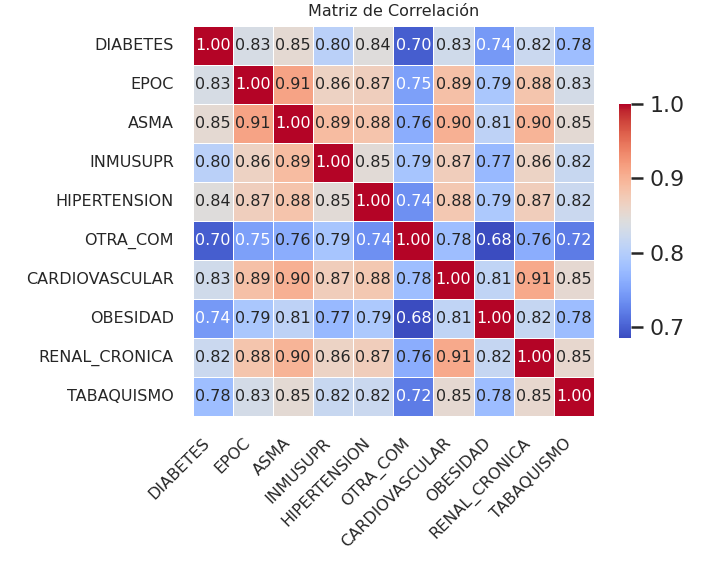

In [ ]:
panel_correlacion = create_correlation_matrix_panel(df)
panel_correlacion.servable()

In [754]:
import folium
import pandas as pd
import panel as pn
import panel.widgets as pnw
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

# Obtener datos del COVID-19 en México
url = 'https://raw.githubusercontent.com/marianarf/covid19_mexico_analysis/master/mexico_covid19.csv'
df = pd.read_csv(url)

# Crear un DataFrame de ejemplo
data = {
    'name': ['Estado A', 'Estado B', 'Estado C'],
    'total_casos': [100, 200, 300],
    'geometry': [Point(-102.525593, 23.634501), Point(-99.133208, 19.432608), Point(-101.916664, 32.633331)]
}
gdf = gpd.GeoDataFrame(data)

def update_marker(selected_estado):
    m = folium.Map(location=[23.634501, -102.525593], zoom_start=5)
    for _, row in gdf.iterrows():
        if selected_estado == 'Todos' or selected_estado == row['name']:
            folium.Marker(
                location=[row['geometry'].y, row['geometry'].x],
                popup=folium.Popup(f"Estado: {row['name']}<br>Total de casos: {row['total_casos']}"),
                icon=folium.Icon(color='red', icon='info-sign')
            ).add_to(m)
    return m

selectEstado = pnw.Select(name="Estado:", width=220, value='Todos', options=['Todos', 'Estado A', 'Estado B', 'Estado C'])

map_callback = pn.bind(update_marker, selectEstado)
map_pane = pn.pane.HTML(map_callback, width=800, height=600)

dashboard = pn.Row(selectEstado, map_pane)
dashboard.servable()

Row
    [0] Select(name='Estado:', options=['Todos', 'Estado A', ...], value='Todos', width=220)
    [1] HTML(Map, height=600, sizing_mode='fixed', width=800)

In [813]:
import folium
import pandas as pd
import panel as pn
import panel.widgets as pnw
import geopandas as gpd
from shapely.geometry import Point
from unidecode import unidecode

# Obtener datos del COVID-19 en México
url = 'https://raw.githubusercontent.com/marianarf/covid19_mexico_analysis/master/mexico_covid19.csv'
df = pd.read_csv(url)

# Crear un DataFrame de ejemplo
data = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'
mexico_map = gpd.read_file(data)

# Calcular el total de casos por estado y convertir 'ENTIDAD_RES' a objeto
total_casos_por_estado = df.groupby('ENTIDAD_RES').size().reset_index(name='total_casos')
total_casos_por_estado['ENTIDAD_RES'] = total_casos_por_estado['ENTIDAD_RES'].astype(str)
total_casos_por_estado.rename(columns={'ENTIDAD_RES': 'name'}, inplace=True)

# Unir los datos de casos con el archivo GeoJSON
mexico_map = mexico_map.merge(total_casos_por_estado, on='name', how='left')

def create_covid_map(df, mexico_map):
    # Quitar acentos
    mexico_map['name'] = mexico_map['name'].apply(unidecode)

    # Calcular el total de casos por estado
    total_casos_por_estado = df.groupby('ENTIDAD').size().reset_index(name='total_casos')

    # Unir los datos de casos con el archivo GeoJSON
    mexico_map = mexico_map.merge(total_casos_por_estado, left_on='name', right_on='ENTIDAD', how='left')

    # Crear un mapa de folium
    m = folium.Map(location=[24, -102], zoom_start=5, tiles='cartodbpositron')

    # Añadir el mapa de coropletas (choropleth map)
    folium.Choropleth(
        geo_data=mexico_map,
        name='Total de Casos de COVID-19 por Estado',
        data=mexico_map,
        columns=['name', 'total_casos'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Total de Casos de COVID-19 por Estado'
    ).add_to(m)

    # Convertir el mapa en un objeto Panel
    map_panel = pn.pane.HTML(m._repr_html_(), width=700, height=450)
    return map_panel

# Función para actualizar los marcadores en el mapa
def update_marker(selected_estado):
    m = folium.Map(location=[23.634501, -102.525593], zoom_start=5)
    estados_agregados = set()
    for _, row in mexico_map.iterrows():
        if selected_estado == 'Todos' or selected_estado == row['name']:
            if row['name'] not in estados_agregados:
                if row['geometry'].geom_type == 'Polygon':
                    coords = row['geometry'].exterior.coords
                    center_lat = sum(p[1] for p in coords) / len(coords)
                    center_lon = sum(p[0] for p in coords) / len(coords)
                    total_casos = row['total_casos']
                    popup_text = f"Estado: {row['name']}<br>"
                    if not pd.isnull(total_casos):
                        popup_text += f"Total de casos: {int(total_casos)}"
                    else:
                        popup_text += "Total de casos: Datos no disponibles"
                    folium.Marker(
                        location=[center_lat, center_lon],
                        popup=folium.Popup(popup_text),
                        icon=folium.Icon(color='red', icon='info-sign')
                    ).add_to(m)
                    estados_agregados.add(row['name'])
                elif row['geometry'].geom_type == 'MultiPolygon':
                    for polygon in row['geometry'].geoms:
                        coords = polygon.exterior.coords
                        center_lat = sum(p[1] for p in coords) / len(coords)
                        center_lon = sum(p[0] for p in coords) / len(coords)
                        total_casos = row['total_casos']
                        popup_text = f"Estado: {row['name']}<br>"
                        if not pd.isnull(total_casos):
                            popup_text += f"Total de casos: {int(total_casos)}"
                        else:
                            popup_text += "Total de casos: Datos no disponibles"
                        folium.Marker(
                            location=[center_lat, center_lon],
                            popup=folium.Popup(popup_text),
                            icon=folium.Icon(color='red', icon='info-sign')
                        ).add_to(m)
                        estados_agregados.add(row['name'])
    return m

selectEstado = pnw.Select(name="Estado:", width=220, value='Todos', options=['Todos'] + mexico_map['name'].tolist())

map_callback = pn.bind(update_marker, selectEstado)
map_pane = pn.pane.HTML(map_callback, width=800, height=600)

dashboard = pn.Row(selectEstado, map_pane)
dashboard.servable()


Row
    [0] Select(name='Estado:', options=['Todos', 'Zacatecas', ...], value='Todos', width=220)
    [1] HTML(Map, height=600, sizing_mode='fixed', width=800)

In [804]:
import folium
import pandas as pd
import panel as pn
import panel.widgets as pnw
import geopandas as gpd
from shapely.geometry import Point

# Obtener datos del COVID-19 en México
url = 'https://raw.githubusercontent.com/marianarf/covid19_mexico_analysis/master/mexico_covid19.csv'
df = pd.read_csv(url)

# Crear un DataFrame de ejemplo
data = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'
mexico_map = gpd.read_file(data)

# Calcular el total de casos por estado y convertir 'ENTIDAD_RES' a objeto
total_casos_por_estado = df.groupby('ENTIDAD_RES').size().reset_index(name='total_casos')
total_casos_por_estado['ENTIDAD_RES'] = total_casos_por_estado['ENTIDAD_RES'].astype(str)
total_casos_por_estado.rename(columns={'ENTIDAD_RES': 'name'}, inplace=True)

# Unir los datos de casos con el archivo GeoJSON
mexico_map = mexico_map.merge(total_casos_por_estado, on='name', how='left')
def update_marker(selected_estado):
    m = folium.Map(location=[23.634501, -102.525593], zoom_start=5)
    for _, row in mexico_map.iterrows():
        if selected_estado == 'Todos' or selected_estado == row['name']:
            if row['geometry'].geom_type == 'Polygon':
                coords = row['geometry'].exterior.coords
                center_lat = sum(p[1] for p in coords) / len(coords)
                center_lon = sum(p[0] for p in coords) / len(coords)
                total_casos = row['total_casos']
                popup_text = f"Estado: {row['name']}<br>"
                if not pd.isnull(total_casos):
                    popup_text += f"Total de casos: {int(total_casos)}"
                else:
                    popup_text += "Total de casos: Datos no disponibles"
                folium.Marker(
                    location=[center_lat, center_lon],
                    popup=folium.Popup(popup_text),
                    icon=folium.Icon(color='red', icon='info-sign')
                ).add_to(m)
            elif row['geometry'].geom_type == 'MultiPolygon':
                for polygon in row['geometry'].geoms:
                    coords = polygon.exterior.coords
                    center_lat = sum(p[1] for p in coords) / len(coords)
                    center_lon = sum(p[0] for p in coords) / len(coords)
                    total_casos = row['total_casos']
                    popup_text = f"Estado: {row['name']}<br>"
                    if not pd.isnull(total_casos):
                        popup_text += f"Total de casos: {int(total_casos)}"
                    else:
                        popup_text += "Total de casos: Datos no disponibles"
                    folium.Marker(
                        location=[center_lat, center_lon],
                        popup=folium.Popup(popup_text),
                        icon=folium.Icon(color='red', icon='info-sign')
                    ).add_to(m)
    return m

selectEstado = pnw.Select(name="Estado:", width=220, value='Todos', options=['Todos'] + mexico_map['name'].tolist())

map_callback = pn.bind(update_marker, selectEstado)
map_pane = pn.pane.HTML(map_callback, width=800, height=600)

dashboard = pn.Row(selectEstado, map_pane)
dashboard.servable()

Row
    [0] Select(name='Estado:', options=['Todos', 'Zacatecas', ...], value='Todos', width=220)
    [1] HTML(Map, height=600, sizing_mode='fixed', width=800)

In [810]:
import folium
import pandas as pd
import panel as pn
import panel.widgets as pnw
import geopandas as gpd

# Obtener datos del COVID-19 en México
url = 'https://raw.githubusercontent.com/marianarf/covid19_mexico_analysis/master/mexico_covid19.csv'
df = pd.read_csv(url)

# Crear un DataFrame de ejemplo
data = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'
mexico_map = gpd.read_file(data)

# Calcular el total de casos por estado y convertir 'ENTIDAD_RES' a objeto
total_casos_por_estado = df.groupby('ENTIDAD_RES').size().reset_index(name='total_casos')
total_casos_por_estado['ENTIDAD_RES'] = total_casos_por_estado['ENTIDAD_RES'].astype(str)
total_casos_por_estado.rename(columns={'ENTIDAD_RES': 'name'}, inplace=True)

# Unir los datos de casos con el archivo GeoJSON
mexico_map = mexico_map.merge(total_casos_por_estado, on='name', how='left')

def update_marker(selected_estado):
    m = folium.Map(location=[23.634501, -102.525593], zoom_start=5)
    estados_agregados = set()
    for _, row in mexico_map.iterrows():
        if selected_estado == 'Todos' or selected_estado == row['name']:
            if row['name'] not in estados_agregados:
                if row['geometry'].geom_type == 'Polygon':
                    coords = row['geometry'].exterior.coords
                    center_lat = sum(p[1] for p in coords) / len(coords)
                    center_lon = sum(p[0] for p in coords) / len(coords)
                    total_casos = row['total_casos']
                    popup_text = f"Estado: {row['name']}<br>"
                    if not pd.isnull(total_casos):
                        popup_text += f"Total de casos: {int(total_casos)}"
                    else:
                        popup_text += "Total de casos: Datos no disponibles"
                    folium.Marker(
                        location=[center_lat, center_lon],
                        popup=folium.Popup(popup_text),
                        icon=folium.Icon(color='red', icon='info-sign')
                    ).add_to(m)
                    estados_agregados.add(row['name'])
                elif row['geometry'].geom_type == 'MultiPolygon':
                    for polygon in row['geometry'].geoms:
                        coords = polygon.exterior.coords
                        center_lat = sum(p[1] for p in coords) / len(coords)
                        center_lon = sum(p[0] for p in coords) / len(coords)
                        total_casos = row['total_casos']
                        popup_text = f"Estado: {row['name']}<br>"
                        if not pd.isnull(total_casos):
                            popup_text += f"Total de casos: {int(total_casos)}"
                        else:
                            popup_text += "Total de casos: Datos no disponibles"
                        folium.Marker(
                            location=[center_lat, center_lon],
                            popup=folium.Popup(popup_text),
                            icon=folium.Icon(color='red', icon='info-sign')
                        ).add_to(m)
                        estados_agregados.add(row['name'])
    return m

selectEstado = pnw.Select(name="Estado:", width=220, value='Todos', options=['Todos'] + mexico_map['name'].tolist())

map_callback = pn.bind(update_marker, selectEstado)
map_pane = pn.pane.HTML(map_callback, width=800, height=600)

dashboard = pn.Row(selectEstado, map_pane)
dashboard.servable()


Row
    [0] Select(name='Estado:', options=['Todos', 'Zacatecas', ...], value='Todos', width=220)
    [1] HTML(Map, height=600, sizing_mode='fixed', width=800)

In [805]:
import folium
import pandas as pd
import panel as pn
import panel.widgets as pnw
import geopandas as gpd
from shapely.geometry import Point
from unidecode import unidecode  # Importar la función unidecode

# Obtener datos del COVID-19 en México
url = 'https://raw.githubusercontent.com/marianarf/covid19_mexico_analysis/master/mexico_covid19.csv'
df = pd.read_csv(url)

# Crear un DataFrame de ejemplo
data = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'
mexico_map = gpd.read_file(data)

# Quitar acentos en los nombres de los estados
mexico_map['name'] = mexico_map['name'].apply(unidecode)

# Calcular el total de casos por estado
total_casos_por_estado = df.groupby('ENTIDAD_RES').size().reset_index(name='total_casos')
total_casos_por_estado['ENTIDAD_RES'] = total_casos_por_estado['ENTIDAD_RES'].astype(str)
total_casos_por_estado.rename(columns={'ENTIDAD_RES': 'name'}, inplace=True)

# Unir los datos de casos con el archivo GeoJSON
mexico_map = mexico_map.merge(total_casos_por_estado, on='name', how='left')

def update_marker(selected_estado):
    m = folium.Map(location=[23.634501, -102.525593], zoom_start=5)
    for _, row in mexico_map.iterrows():
        if selected_estado == 'Todos' or selected_estado == row['name']:
            if row['geometry'].geom_type == 'Polygon':
                coords = row['geometry'].exterior.coords
                # Verificar si la longitud de las coordenadas es mayor que un umbral
                if len(coords) > 3:  # Considerar solo geometrías que representan estados individuales
                    center_lat = sum(p[1] for p in coords) / len(coords)
                    center_lon = sum(p[0] for p in coords) / len(coords)
                    total_casos = row['total_casos']
                    popup_text = f"Estado: {row['name']}<br>"
                    if not pd.isnull(total_casos):
                        popup_text += f"Total de casos: {int(total_casos)}"
                    else:
                        popup_text += "Total de casos: Datos no disponibles"
                    folium.Marker(
                        location=[center_lat, center_lon],
                        popup=folium.Popup(popup_text),
                        icon=folium.Icon(color='red', icon='info-sign')
                    ).add_to(m)
    return m

# Strip para eliminar espacios en blanco alrededor de los nombres de los estados
options=['Todos'] + mexico_map['name'].str.strip().tolist()
selectEstado = pnw.Select(name="Estado:", width=220, value='Todos', options=options)

map_callback = pn.bind(update_marker, selectEstado)
map_pane = pn.pane.HTML(map_callback, width=800, height=600)

dashboard = pn.Row(selectEstado, map_pane)
dashboard.servable()

Row
    [0] Select(name='Estado:', options=['Todos', 'Zacatecas', ...], value='Todos', width=220)
    [1] HTML(Map, height=600, sizing_mode='fixed', width=800)

In [800]:
import folium
import pandas as pd
import panel as pn
import panel.widgets as pnw
import geopandas as gpd
from shapely.geometry import Point

# Obtener datos del COVID-19 en México
url = 'https://raw.githubusercontent.com/marianarf/covid19_mexico_analysis/master/mexico_covid19.csv'
df = pd.read_csv(url)

# Crear un DataFrame de ejemplo
data = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'
mexico_map = gpd.read_file(data)

# Calcular el total de casos por estado y convertir 'ENTIDAD_RES' a objeto
total_casos_por_estado = df.groupby('ENTIDAD_RES').size().reset_index(name='total_casos')
total_casos_por_estado['ENTIDAD_RES'] = total_casos_por_estado['ENTIDAD_RES'].astype(str)
total_casos_por_estado.rename(columns={'ENTIDAD_RES': 'name'}, inplace=True)

# Unir los datos de casos con el archivo GeoJSON
mexico_map = mexico_map.merge(total_casos_por_estado, on='name', how='left')

def update_marker(selected_estado):
    m = folium.Map(location=[23.634501, -102.525593], zoom_start=5)
    for _, row in mexico_map.iterrows():
        if selected_estado == 'Todos' or selected_estado == row['name']:
            if row['geometry'].geom_type == 'Polygon':
                coords = row['geometry'].exterior.coords
                # Verificar si la longitud de las coordenadas es mayor que un umbral
                if len(coords) > 3:  # Considerar solo geometrías que representan estados individuales
                    center_lat = sum(p[1] for p in coords) / len(coords)
                    center_lon = sum(p[0] for p in coords) / len(coords)
                    total_casos = row['total_casos']
                    popup_text = f"Estado: {row['name']}<br>"
                    if not pd.isnull(total_casos):
                        popup_text += f"Total de casos: {int(total_casos)}"
                    else:
                        popup_text += "Total de casos: Datos no disponibles"
                    folium.Marker(
                        location=[center_lat, center_lon],
                        popup=folium.Popup(popup_text),
                        icon=folium.Icon(color='red', icon='info-sign')
                    ).add_to(m)
    return m

selectEstado = pnw.Select(name="Estado:", width=220, value='Todos', options=['Todos'] + mexico_map['name'].tolist())

map_callback = pn.bind(update_marker, selectEstado)
map_pane = pn.pane.HTML(map_callback, width=800, height=600)

dashboard = pn.Row(selectEstado, map_pane)
dashboard.servable()

Row
    [0] Select(name='Estado:', options=['Todos', 'Zacatecas', ...], value='Todos', width=220)
    [1] HTML(Map, height=600, sizing_mode='fixed', width=800)

In [801]:
import folium
import pandas as pd
import panel as pn
import panel.widgets as pnw
import geopandas as gpd
from shapely.geometry import Point

# Obtener datos del COVID-19 en México
url = 'https://raw.githubusercontent.com/marianarf/covid19_mexico_analysis/master/mexico_covid19.csv'
df = pd.read_csv(url)

# Crear un DataFrame de ejemplo
data = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'
mexico_map = gpd.read_file(data)

# Calcular el total de casos por estado y convertir 'ENTIDAD_RES' a objeto
total_casos_por_estado = df.groupby('ENTIDAD_RES').size().reset_index(name='total_casos')
total_casos_por_estado['ENTIDAD_RES'] = total_casos_por_estado['ENTIDAD_RES'].astype(str)
total_casos_por_estado.rename(columns={'ENTIDAD_RES': 'name'}, inplace=True)

# Unir los datos de casos con el archivo GeoJSON
mexico_map = mexico_map.merge(total_casos_por_estado, on='name', how='left')

def update_marker(selected_estado):
    m = folium.Map(location=[23.634501, -102.525593], zoom_start=5)
    for _, row in mexico_map.iterrows():
        if selected_estado == 'Todos' or selected_estado == row['name']:
            if row['geometry'].geom_type == 'Polygon':
                coords = row['geometry'].exterior.coords
                # Verificar si la longitud de las coordenadas es mayor que un umbral
                if len(coords) > 3:  # Considerar solo geometrías que representan estados individuales
                    center_lat = sum(p[1] for p in coords) / len(coords)
                    center_lon = sum(p[0] for p in coords) / len(coords)
                    total_casos = row['total_casos']
                    popup_text = f"Estado: {row['name']}<br>"
                    if not pd.isnull(total_casos):
                        popup_text += f"Total de casos: {int(total_casos)}"
                    else:
                        popup_text += "Total de casos: Datos no disponibles"
                    folium.Marker(
                        location=[center_lat, center_lon],
                        popup=folium.Popup(popup_text),
                        icon=folium.Icon(color='red', icon='info-sign')
                    ).add_to(m)
    return m

# Strip para eliminar espacios en blanco alrededor de los nombres de los estados
options=['Todos'] + mexico_map['name'].str.strip().tolist()
selectEstado = pnw.Select(name="Estado:", width=220, value='Todos', options=options)

map_callback = pn.bind(update_marker, selectEstado)
map_pane = pn.pane.HTML(map_callback, width=800, height=600)

dashboard = pn.Row(selectEstado, map_pane)
dashboard.servable()

Row
    [0] Select(name='Estado:', options=['Todos', 'Zacatecas', ...], value='Todos', width=220)
    [1] HTML(Map, height=600, sizing_mode='fixed', width=800)

In [794]:
# Función para crear el mapa de COVID-19
def create_covid_map(df, mexico_map):
    # Quitar acentos
    mexico_map['name'] = mexico_map['name'].apply(unidecode)

    # Calcular el total de casos por estado
    total_casos_por_estado = df.groupby('ENTIDAD').size().reset_index(name='total_casos')

    # Unir los datos de casos con el archivo GeoJSON
    mexico_map = mexico_map.merge(total_casos_por_estado, left_on='name', right_on='ENTIDAD', how='left')

    # Crear un mapa de folium
    m = folium.Map(location=[24, -102], zoom_start=5, tiles='cartodbpositron')

    # Añadir el mapa de coropletas (choropleth map)
    folium.Choropleth(
        geo_data=mexico_map,
        name='Total de Casos de COVID-19 por Estado',
        data=mexico_map,
        columns=['name', 'total_casos'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Total de Casos de COVID-19 por Estado'
    ).add_to(m)

    # Añadir los marcadores con las etiquetas al mapa
    for idx, row in mexico_map.iterrows():
        if not pd.isna(row['total_casos']):
            centroid = row['geometry'].representative_point()
            folium.Marker(
                location=[centroid.y, centroid.x],
                popup=folium.Popup(f"{row['name']}<br>Total de casos: {int(row['total_casos'])}"),
                icon=folium.Icon(color='red', icon='info-sign')
            ).add_to(m)

    # Convertir el mapa en un objeto Panel
    map_panel = pn.pane.HTML(m._repr_html_(), width=700, height=450)

    # Obtener las opciones para el select
    options = ['Todos'] + mexico_map['name'].tolist()

    # Crear el select
    selectEstado = pnw.Select(name="Estado:", width=220, value='Todos', options=options)

    # Función para actualizar los marcadores según el estado seleccionado
    def update_markers(selected_estado):
        for idx, row in mexico_map.iterrows():
            if selected_estado == 'Todos' or selected_estado == row['name']:
                centroid = row['geometry'].representative_point()
                folium.Marker(
                    location=[centroid.y, centroid.x],
                    popup=folium.Popup(f"{row['name']}<br>Total de casos: {int(row['total_casos'])}"),
                    icon=folium.Icon(color='red', icon='info-sign')
                ).add_to(m)
        map_panel.object = m._repr_html_()

    # Vincular el select con la función de actualización
    selectEstado.param.watch(update_markers, 'value')

    # Crear el panel con el select y el mapa
    dashboard = pn.Column(selectEstado, map_panel)
    return dashboard

# Utilizar la función para crear el mapa
dashboard = create_covid_map(df, mexico_map)

# Mostrar el panel
dashboard.servable()

Column
    [0] Select(name='Estado:', options=['Todos', 'Zacatecas', ...], value='Todos', width=220)
    [1] HTML(str, height=450, sizing_mode='fixed', width=700)

In [803]:
import folium
import pandas as pd
import panel as pn
import panel.widgets as pnw
import geopandas as gpd
from shapely.geometry import Point

# Obtener datos del COVID-19 en México
url = 'https://raw.githubusercontent.com/marianarf/covid19_mexico_analysis/master/mexico_covid19.csv'
df = pd.read_csv(url)

# Crear un DataFrame de ejemplo
data = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'
mexico_map = gpd.read_file(data)

# Verificar y corregir geometrías inválidas
mexico_map['geometry'] = mexico_map['geometry'].apply(lambda x: x.buffer(0) if x.is_valid else x)

# Calcular el total de casos por estado y convertir 'ENTIDAD_RES' a objeto
total_casos_por_estado = df.groupby('ENTIDAD_RES').size().reset_index(name='total_casos')
total_casos_por_estado['ENTIDAD_RES'] = total_casos_por_estado['ENTIDAD_RES'].astype(str)
total_casos_por_estado.rename(columns={'ENTIDAD_RES': 'name'}, inplace=True)

# Unir los datos de casos con el archivo GeoJSON
mexico_map = mexico_map.merge(total_casos_por_estado, on='name', how='left')

def update_marker(selected_estado):
    m = folium.Map(location=[23.634501, -102.525593], zoom_start=5)
    for _, row in mexico_map.iterrows():
        if selected_estado == 'Todos' or selected_estado == row['name']:
            if row['geometry'].geom_type == 'Polygon':
                coords = row['geometry'].exterior.coords
                center_lat = sum(p[1] for p in coords) / len(coords)
                center_lon = sum(p[0] for p in coords) / len(coords)
                total_casos = row['total_casos']
                popup_text = f"Estado: {row['name']}<br>"
                if not pd.isnull(total_casos):
                    popup_text += f"Total de casos: {int(total_casos)}"
                else:
                    popup_text += "Total de casos: Datos no disponibles"
                folium.Marker(
                    location=[center_lat, center_lon],
                    popup=folium.Popup(popup_text),
                    icon=folium.Icon(color='red', icon='info-sign')
                ).add_to(m)
    return m

selectEstado = pnw.Select(name="Estado:", width=220, value='Todos', options=['Todos'] + mexico_map['name'].tolist())

map_callback = pn.bind(update_marker, selectEstado)
map_pane = pn.pane.HTML(map_callback, width=800, height=600)

dashboard = pn.Row(selectEstado, map_pane)
dashboard.servable()

Row
    [0] Select(name='Estado:', options=['Todos', 'Zacatecas', ...], value='Todos', width=220)
    [1] HTML(Map, height=600, sizing_mode='fixed', width=800)

#Mostrar Dashboard

Row(styles={'background': '...})
    [0] Column
        [0] Markdown(str)
        [1] Select(name='Estado:', options=['Todos', 'Jalisco'], value='Todos', width=220)
        [2] Row
            [0] Select(name='Sexo:', options=['Todos', 'Femenino', ...], value='Todos', width=100)
            [1] IntInput(end=100, name='Edad:', start=1, width=100)
        [3] StaticText(value='Seleccione una métrica:')
        [4] RadioButtonGroup(name='Metrica', options=['Matriz de correlación', ...], value='Matriz de correlación', width=100)
    [1] HTML(str, height=450, sizing_mode='fixed', width=700)
    [2] Matplotlib(Figure)
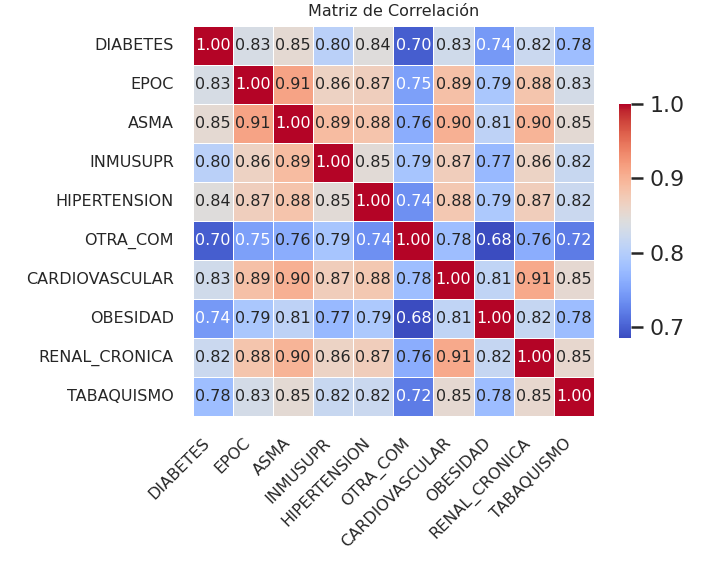

In [ ]:
# Texto en formato markdown para el panel
markdown_text = """
# DASHBOARD

### Panel params
"""
# Crear un panel con el texto markdown
panel = pn.panel(markdown_text)

# Widgets
selectEstado = pnw.Select(name="Estado:", width=220, value='Todos', options=['Todos','Jalisco'])
selectEdad = pnw.IntInput(name='Edad:', width=100, value=0, step=1, start=1, end=100)
selectSexo = pnw.Select(name='Sexo:', width=100, value='Todos', options=['Todos','Femenino', 'Masculino'])
metrica = pnw.RadioButtonGroup(name='Metrica', width=100, options=['Matriz de correlación', 'MSD'])
subtitulo = pnw.StaticText(value='Seleccione una métrica:')

# Crear la matriz de correlación
panel_correlacion = create_correlation_matrix_panel(df)

# Crear el panel con los widgets y la matriz de correlación
pn.Row(
    pn.Column(markdown_text,selectEstado, pn.Row(selectSexo, selectEdad),subtitulo, metrica),
    create_covid_map(df, mexico_map).servable(),
    panel_correlacion.servable(),
    styles={'background': 'lightcyan'}
)

Panel temporal, trabajando función para actualizar widget

interactive(children=(Dropdown(description='sexo', options=('Todos', 'Femenino', 'Masculino'), value='Todos'),…

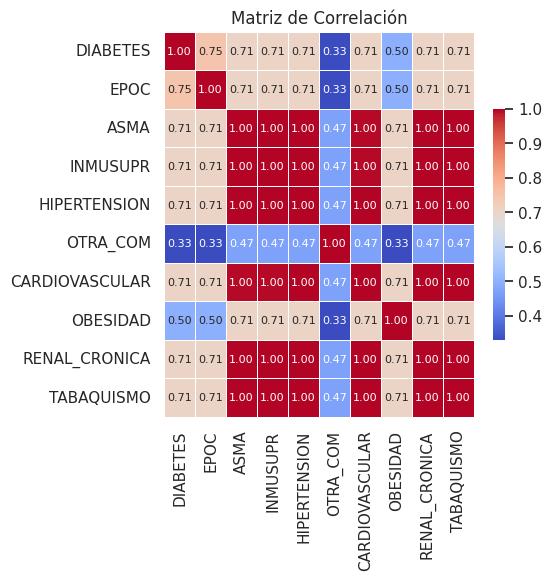

In [ ]:
import pandas as pd
import geopandas as gpd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import panel as pn
import panel.widgets as pnw
from unidecode import unidecode
from ipywidgets import interact

# Descargar el archivo GeoJSON de los límites de México
geojson_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'
mexico_map = gpd.read_file(geojson_url)

# Cargar los datos del archivo CSV
url = 'https://raw.githubusercontent.com/marianarf/covid19_mexico_analysis/master/mexico_covid19.csv'
df = pd.read_csv(url)

# Función para crear el mapa de COVID-19
def create_covid_map(df, mexico_map):
    # Quitar acentos
    mexico_map['name'] = mexico_map['name'].apply(unidecode)

    # Calcular el total de casos por estado
    total_casos_por_estado = df.groupby('ENTIDAD').size().reset_index(name='total_casos')

    # Unir los datos de casos con el archivo GeoJSON
    mexico_map = mexico_map.merge(total_casos_por_estado, left_on='name', right_on='ENTIDAD', how='left')

    # Crear un mapa de folium
    m = folium.Map(location=[24, -102], zoom_start=5, tiles='cartodbpositron')

    # Añadir el mapa de coropletas (choropleth map)
    folium.Choropleth(
        geo_data=mexico_map,
        name='Total de Casos de COVID-19 por Estado',
        data=mexico_map,
        columns=['name', 'total_casos'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Total de Casos de COVID-19 por Estado'
    ).add_to(m)

    # Convertir el mapa en un objeto Panel
    map_panel = pn.pane.HTML(m._repr_html_(), sizing_mode='stretch_both')
    return map_panel
# Función para crear la matriz de correlación
def create_correlation_matrix_panel2(df, sexo, edad):
    # Filtrar el DataFrame según la selección de sexo y edad
    if sexo != 'Todos' and edad != 0:
        df_filtrado = df[(df['SEXO'] == sexo) & (df['EDAD'] == edad)]
    elif sexo != 'Todos':
        df_filtrado = df[df['SEXO'] == sexo]
    elif edad != 0:
        df_filtrado = df[df['EDAD'] == edad]
    else:
        df_filtrado = df

    columnas_seleccionadas = ["DIABETES", "EPOC", "ASMA", "INMUSUPR", "HIPERTENSION", "OTRA_COM", "CARDIOVASCULAR", "OBESIDAD",
                               "RENAL_CRONICA", "TABAQUISMO"]

    df_filtrado = df_filtrado[columnas_seleccionadas]
    matriz_correlacion = df_filtrado.corr()

    sns.set(style="white")
    plt.figure(figsize=(5, 5))
    sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, annot_kws={"size": 8}, cbar_kws={"shrink": 0.6})
    plt.title("Matriz de Correlación")

    # Convertir la figura en un objeto Panel
    matrix_panel = pn.pane.Matplotlib(plt.gcf(), tight=True, sizing_mode='stretch_both')
    return matrix_panel

# Widgets
selectEstado = pnw.Select(name="Estado:", width=220, value='Todos', options=['Todos','Jalisco'])
selectEdad = pnw.Select(name='Edad:', width=100, value=0,options=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,30,40,50,60,70])
selectSexo = pnw.Select(name='Sexo:', width=100, value='Todos', options=['Todos','Femenino', 'Masculino'])

# Función para actualizar la matriz de correlación y el mapa de COVID-19
@interact(sexo=selectSexo.options, edad=selectEdad.options)
def update_plots(sexo, edad):
    # Crear el panel con los widgets y los paneles de los mapas
    layout = pn.Row(
        pn.Column(selectEstado, pn.Row(selectSexo, selectEdad)),
        create_covid_map(df, mexico_map),
        create_correlation_matrix_panel2(df, sexo, edad)
    )
    layout.servable()